# Step1. 사진 모으기

1. 내 사진 찍기  
- 내 사진을 2장 이상 포함합시다.  
- 내 사진들끼리의 얼굴 임베딩 벡터 거리를 구해 봅시다. 닮았음을 확인할 수 있는 좋은 베이스라인이 될 수 있습니다.  
- 혹시 내 사진들끼리의 거리가 멀게 나온다면 왜 그럴지 생각해 봅시다.  
  
2. 비교할 연예인 사진 모으기  
- 많이 모을수록 나와 더 닮은 연예인을 찾을 가능성이 높아질 것입니다.  
- 주위의 동료들과 모은 사진을 주고받는 것도 하나의 방법입니다.

file_list: ['kimkura.jpg', 'joinsung.jpg', 'lbh2.jpg', 'ohjeongse.jpg', 'hajungwu.jpg', 'jeongwusueng.jpg', 'choiminsik.jpg', 'gosu.jpg', 'yujeumyoung.jpg', 'sulkyoungku.jpg', 'cheonhojin.jpg', 'kimruiha.jpg', 'lbh3.jpg', 'leesoejin.jpg', 'annaedang.jpg', 'leejeungjae.jpg', 'jisung.jpg', 'choiminsu.jpg', 'gangdongwon.jpg', 'hansukgyu.jpg']


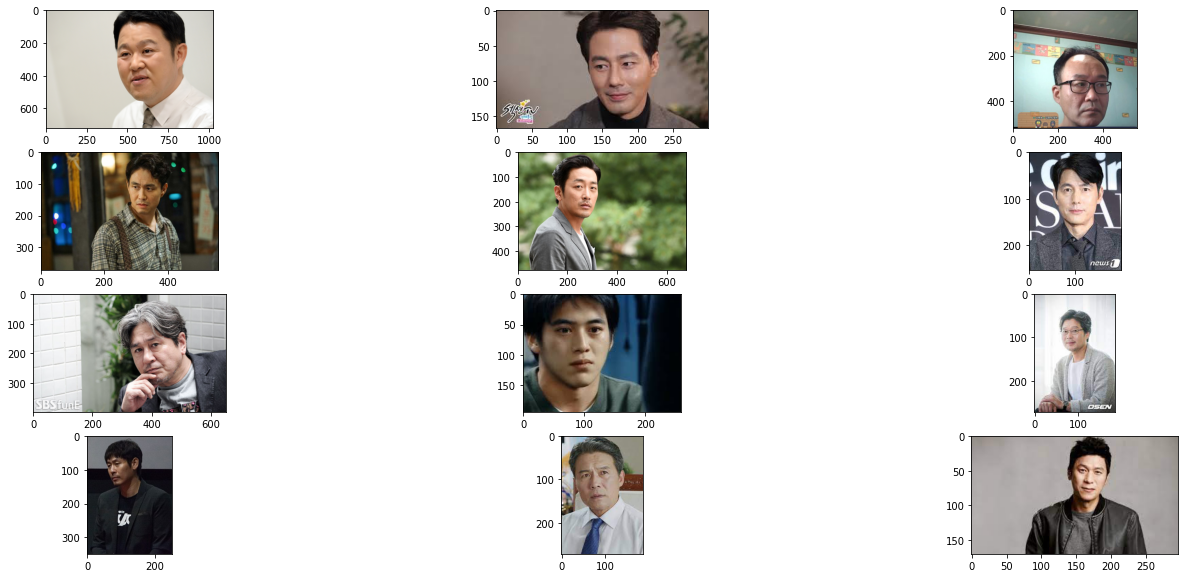

In [1]:
import os

dir_path = os.getenv('HOME')+'/aiffel/Exploration/05_face_embedding/images2'
file_list = os.listdir(dir_path)

print ("file_list: {}".format(file_list))

import matplotlib.pyplot as plt
import matplotlib.image as img

#Set figsize here
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(24,10))

# flatten axes for easy iterating
for i, ax in enumerate(axes.flatten()):
  image = img.imread(dir_path+'/'+file_list[i])
  ax.imshow(image)
plt.show()

fig.tight_layout()

# Step2. 얼굴 영역 자르기

- 임베딩 추출을 위해서는 얼굴 영역을 잘라줘야 합니다. 위 Step1.에서 찾은 이미지들을 이전에 만들었던 get_cropped_face(image_file)을 통해서 잘라줍시다!     
   
- 자른 이미지는 PIL의 Image.fromarray를 통해서 PIL Image로 변환한 뒤에 저장을 해두면 다양한 재미있는 시각화를 시도해 보는 데 도움이 될 것입니다.

In [2]:
import face_recognition
import os
from PIL import Image

def get_cropped_face(image_file):
    image = face_recognition.load_image_file(image_file)
    face_locations = face_recognition.face_locations(image)
    a, b, c, d = face_locations[0]
    cropped_face = image[a:c,d:b,:]    
    return cropped_face

def save_cropped_faces(image_path, path_to_save):
    os.makedirs(path_to_save, exist_ok = True)
    files = os.listdir(image_path)
    
    for file in files:
        face = get_cropped_face(image_path + '/' + file)
        pillow_image = Image.fromarray(face)
        pillow_image.save(path_to_save + '/' + file)
          

In [3]:
image_path = os.getenv('HOME')+'/aiffel/Exploration/05_face_embedding/images2'
path_to_save = os.getenv('HOME')+'/aiffel/Exploration/05_face_embedding/cropped_images2'

cropped_face = save_cropped_faces(image_path, path_to_save)

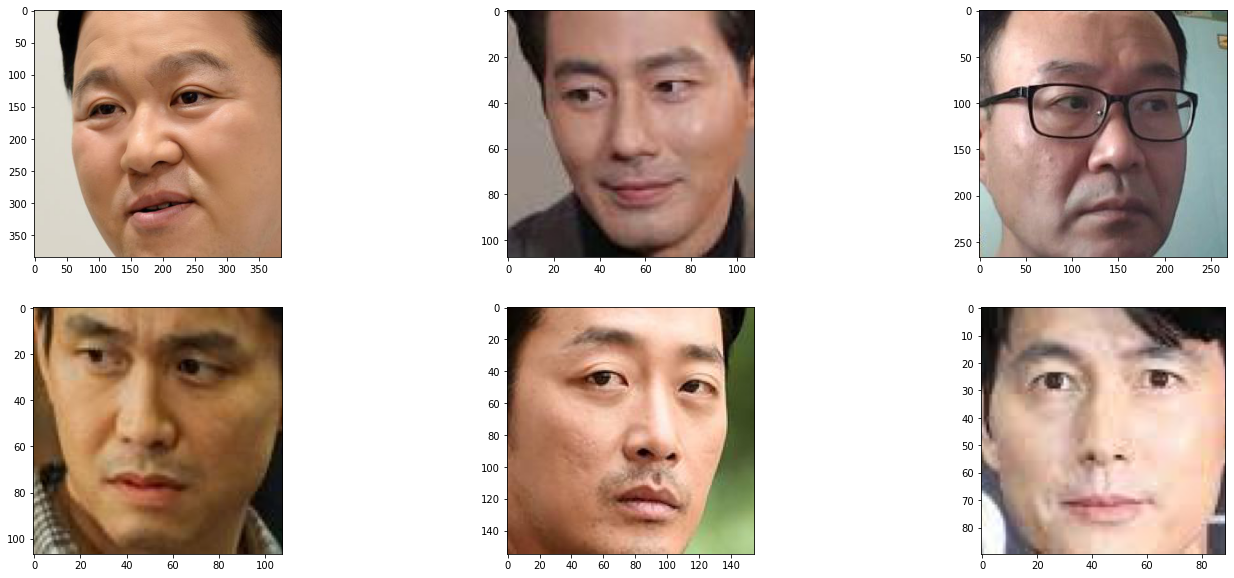

In [4]:
#Set figsize here
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(24,10))

# flatten axes for easy iterating
for i, ax in enumerate(axes.flatten()):
    image = img.imread(path_to_save+'/'+file_list[i])
    ax.imshow(image)
plt.show()

fig.tight_layout()

# Step3. 얼굴 영역의 임베딩 추출하기

이제 얼굴 영역으로 잘린 이미지들이 여럿 생겼을 텐데요. 그 이미지를 face_recognition 을 사용해서 이미지를 불러오고 임베딩을 추출해 봅시다. 다른 사람의 임베딩은 구분할 수 있게 따로 저장해 주세요. 이전에 만들었던 다음 함수들을 활용하면 손쉽게 수행 가능합니다.   
   
def get_face_embedding(face) : 얼굴영역으로부터 얼굴 임베딩 벡터를 구하는 함수   
def get_face_embedding_dict(dir_path) : 디렉토리 안에 있는 모든 이미지의 임베딩 딕셔너리를 구하는 함수

In [14]:
dir_path = os.getenv('HOME')+'/aiffel/Exploration/05_face_embedding/cropped_images2'
file_list = os.listdir(dir_path)

print ("file_list: {}".format(file_list))

file_list: ['kimkura.jpg', 'joinsung.jpg', 'lbh2.jpg', 'ohjeongse.jpg', 'hajungwu.jpg', 'jeongwusueng.jpg', 'choiminsik.jpg', 'gosu.jpg', 'yujeumyoung.jpg', 'sulkyoungku.jpg', 'cheonhojin.jpg', 'kimruiha.jpg', 'leesoejin.jpg', 'annaedang.jpg', 'leejeungjae.jpg', 'jisung.jpg', 'choiminsu.jpg', 'gangdongwon.jpg', 'hansukgyu.jpg']


In [15]:
image_file = os.path.join(dir_path, 'lbh2.jpg')
face = get_cropped_face(image_file)   # 얼굴 영역을 구하는 함수(이전 스텝에서 구현)

# 얼굴 영역을 가지고 얼굴 임베딩 벡터를 구하는 함수
def get_face_embedding(face):
    return face_recognition.face_encodings(face)

embedding = get_face_embedding(face)  
# embedding

In [16]:
def get_face_embedding_dict(dir_path):
    file_list = os.listdir(dir_path)
    embedding_dict = {}
    cropped_dict = {}
    
    for file in file_list:
        img_path = os.path.join(dir_path, file)
        face = get_cropped_face(img_path)
        if face == []:
            continue
        embedding = get_face_embedding(face)
        if len(embedding) > 0:  
        # 얼굴영역 face가 제대로 detect되지 않으면  len(embedding)==0인 경우가 발생하므로 
        # os.path.splitext(file)[0]에는 이미지파일명에서 확장자를 제거한 이름이 담깁니다. 
            embedding_dict[os.path.splitext(file)[0]] = embedding[0]
            cropped_dict[os.path.splitext(file)[0]] = face
        
    return embedding_dict, cropped_dict

In [24]:
embedding_dict, cropped_dict = get_face_embedding_dict(dir_path)
# embedding_dict['lbh3']

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if __name__ == '__main__':


# Step4. 모은 연예인들과 비교하기

- def get_cropped_face(image_file) : 이미지 파일에서 얼굴 영역을 가져오는 함수    
- def get_face_embedding(face) : 얼굴영역으로부터 얼굴 임베딩 벡터를 구하는 함수    
- def get_face_embedding_dict(dir_path) : 디렉토리 안에 있는 모든 이미지의 임베딩 딕셔너리와 얼굴영역만의 이미지 딕셔너리를 구하는 함수    
- def get_distance(name1, name2) : 두 이미지(사람 이름) 사이의 임베딩 벡터 거리를 구하는 함수

모은 연예인 사진들과 자신의 얼굴 사진에서 추출한 임베딩 벡터들 간의 거리를 비교해 보고 가장 작은 연예인이 누구인지 찾아봅시다!

이전 스텝에서 만들었던 get_nearest_face(name, top=5) 함수들을 응용하면 손쉽게 수행 가능합니다.

In [18]:
# name1과 name2의 거리를 비교하는 함수를 생성하되, 
# name1은 미리 지정하고, name2는 호출시에 인자로 받도록 합니다.
def get_sort_key_func(name1):
    def get_distance_from_name1(name2):
        return get_distance(name1, name2)
    return get_distance_from_name1

sort_key_func = get_sort_key_func('lbh2')   
# 이렇게 생성된 함수 sort_key_func는 sort_key_func('lbh2') 라고 호출할 때 
# lbh2와 lbh3 사이의 임베딩 벡터 거리를 계산합니다.

In [19]:
def get_nearest_face(name, top=5):
    global sorted_faces
    sort_key_func = get_sort_key_func(name)
    sorted_faces = sorted(embedding_dict.items(), key=lambda x:sort_key_func(x[0]))
    
    for i in range(top+1):
        if i == 0 :   # 첫번째로 나오는 이름은 자기 자신일 것이므로 제외합시다. 
            continue
        if sorted_faces[i]:
            print('순위 {} : 이름({}), 거리({})'.format(i, sorted_faces[i][0], sort_key_func(sorted_faces[i][0])))

In [20]:
# lbh2와 가장 닮은 사람은 누굴까요?
get_nearest_face('lbh2')

순위 1 : 이름(hajungwu), 거리(0.49305549399124143)
순위 2 : 이름(cheonhojin), 거리(0.5025616847344827)
순위 3 : 이름(kimkura), 거리(0.5121867071997701)
순위 4 : 이름(yujeumyoung), 거리(0.5342126344066647)
순위 5 : 이름(choiminsik), 거리(0.5487647470265393)


# Step5. 다양한 재미있는 시각화 시도해 보기

비단 닮은 꼴 연예인을 찾기만 할 것이 아니라, 그들의 얼굴 사진을 활용하여 재미있는 시각화를 시도해 보시기 바랍니다.
tkinter나 flask를 활용해서 닮은꼴을 찾을 이미지를 업로드한 후 그 이미지와 닮은 얼굴을 찾는 형태로 구현해 보는 것도 재미있을 것입니다.

In [21]:
# 순위에 맞는 이미지 출력
def get_nearest_face_images(sorted_faces, top=5):
    fig = plt.figure(figsize=(15, 5))
    fig.add_subplot(2, top, 1)
    plt.imshow(cropped_dict[sorted_faces[0][0]])
    for i in range(1, top+1):
        fig.add_subplot(2, top, i+5)
        plt.imshow(cropped_dict[sorted_faces[i][0]])

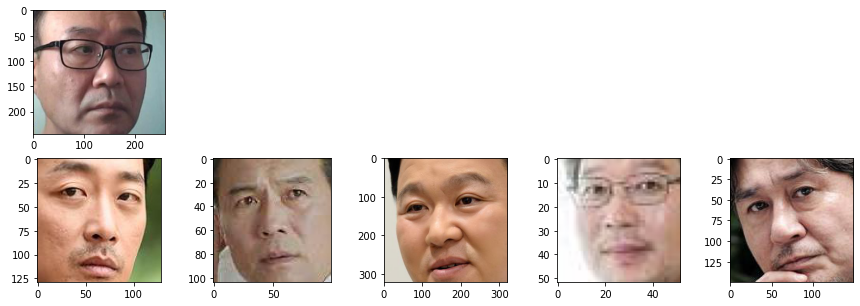

In [22]:
# 순위에 따른 이미지 출력
get_nearest_face_images(sorted_faces)

1. 얼굴임베딩 벡터를 활용해 가장 닮은 연예인 Best 5(하정우, 천호진, 김구라, 유재명, 최민식 순)으로 닮은꼴 순위, 이름, 임베딩 거리를 포함한 리스트가 정렬되어 출력되었다.   
2. 초기에는 나의 사진을 2개 더 넣어 어떤 차이가 있는지 확인하였다. 동시간대의 사진은 사진 각도가 다름에도 불구하고 매우 가깝게 나왔지만, 15년전 사진과 비교했더니 0.5를 훨씬 초과하였다. 또한 Best5의 연예인들도 동년배인 점을 감안할 때 연령대가 감안됨을 추정된다. 가장 가까운 하정우는 0.493으로 가까스로 0.5미만에 들어왔다. 제출 전날 추가 이미지를 구했던 보람이 있다.
3. tkinter로 시각화를 구현하려 하였으나 시간 관계상 matplotlib으로 구현하였다. 이것 마저도 만만치 않았다. 물론 아직 숙지가 안된 탓이다. 핵심은 순위관련 자료를 ndarray자료로 추출하는 것이다. 순위추출 함수는 함수내에서 print하므로 none타입이므로 주의해야 한다.
4. 본 과정에서는 임베딩 개념을 정립하고 사용되는 것을 구현하였다. 벡터공간에서 차원을 축소해서 임베딩으로 관리하고 비교대상의 이미지의 임베딩과 거리측정하여 닮을 확률을 도출하였다. 과제 수행 초기에는 함수화하고 작업흐름을 정확히 추적하지 않으면 혼란을 겪기도 했다.